In [1]:
import numpy as np
import pandas as pd

# EX 1

In [2]:
laptops = pd.read_csv('laptops.csv', encoding='latin-1')

## Clean column names

In [3]:
def clean_labels(s):
    s = s.strip()
    s = s.replace('Operating System', 'os')
    s = s.replace(' ', '_')
    s = s.replace('(', '')
    s = s.replace(')', '')
    s = s.lower()
    return s

In [4]:
new_labels = [clean_labels(old_label) for old_label in laptops.columns]
laptops.columns = new_labels
laptops.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


## Convert RAM, Price, Weight into numerical columns (create new columns)

In [5]:
laptops['ram_gb'] = laptops.ram.str.slice(0, -2).astype('int')

In [6]:
laptops['price_euros_num'] = laptops.price_euros.str.replace(',', '.').astype('float')

In [7]:
laptops['weight_kg'] = laptops.weight.str.replace('kg', '').str.replace('s', '').astype('float')

## Extract CPU speed from CPU column

In [8]:
laptops['cpu_speed'] = laptops.cpu.str.replace('GHz', '').str.extract('([0-9\.]*)$').astype('float')

## Correcting values of os column

In [9]:
mapping = {'Windows': 'Windows', 'No OS': 'No OS', 'Linux': 'Linux', 'Chrome OS': 'Chrome OS', 'macOS': 'macOS', 'Mac OS': 'macOS', 'Android': 'Android'}

In [10]:
laptops['os_new'] = laptops.os.map(mapping)
laptops.os_new.value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: os_new, dtype: int64

## Handle missing values of os_version column

In [11]:
laptops.os_version.value_counts(dropna=False)

10      1072
NaN      170
7         45
X          8
10 S       8
Name: os_version, dtype: int64

In [12]:
laptops_copy = laptops.copy()
laptops_copy.loc[laptops.os_new == "No OS", "os_version"] = "No OS"
laptops_copy.loc[laptops.os_new == "macOS", "os_version"] = "X"
laptops_copy.os_version.value_counts(dropna=False)
laptops_copy.dropna(inplace=True)

laptops.os_version = laptops_copy.os_version
laptops.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_euros_num,weight_kg,cpu_speed,os_new
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,X,1.37kg,"1339,69",8,1339.69,1.37,2.3,macOS
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,X,1.34kg,"898,94",8,898.94,1.34,1.8,macOS
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,No OS,1.86kg,"575,00",8,575.00,1.86,2.5,No OS
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,X,1.83kg,"2537,45",16,2537.45,1.83,2.7,macOS
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,X,1.37kg,"1803,60",8,1803.60,1.37,3.1,macOS


# EX 2 : Convert Screen Size column in to numeric and use that column to answer

## What is the popular screen size ?

In [13]:
laptops.screen_size.value_counts().head(1)

15.6"    665
Name: screen_size, dtype: int64

## What is the minimum screen size of Ultrabook ?

In [14]:
laptops.screen_size = laptops.screen_size.str.replace('"', '').astype('float')
min(laptops.screen_size)

10.1

## What is the average screen size of gaming laptop ?

In [15]:
laptops.loc[laptops.category == 'Gaming'].screen_size.mean()

16.345853658536583

# Extract Screen Resolution (for example 2880x1800), and answer:

## How many laptop has full hd (1920x1080) screen ?

In [16]:
laptops['screen_size_px'] = laptops.screen.str.extract('([0-9]+\w+[0-9])')
laptops.screen_size_px.value_counts()['1920x1080']

841

## What is the popular screen resolution of Macbook ?

In [17]:
mac_pc = laptops[laptops['manufacturer'] == 'Apple']
qr = mac_pc.screen_size_px.value_counts()
for i, j in enumerate(qr):
    if j != qr[0]:
        print(qr.head(i))
        break

2560x1600    6
2304x1440    6
Name: screen_size_px, dtype: int64


# EX 4

In [18]:
laptops['storage_gb'] = laptops.storage.str.extract('([0-9]+GB)')
laptops['storage_ssd'] = laptops.storage.str.extract('(SSD)')
laptops['storage_hdd'] = laptops.storage.str.extract('(HDD)')

In [19]:
laptops.storage_ssd.loc[laptops.storage_ssd.isnull()] = '0'
laptops.storage_hdd.loc[laptops.storage_hdd.isnull()] = '0'

c:\users\tunga\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
laptops.storage_ssd = laptops.storage_ssd.str.replace('SSD', '1')
laptops.storage_hdd = laptops.storage_hdd.str.replace('HDD', '1')

In [21]:
laptops.storage_ssd.isnull().any()
laptops.storage_hdd.isnull().any()

False

## How many laptop have ssd storage ?

In [22]:
ssd_nums = laptops.storage_ssd.value_counts()['1']
ssd_nums

843

## How many laptop have hdd storage ?

In [23]:
hdd_nums = laptops.storage_hdd.value_counts()['1']
hdd_nums

576

## On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

In [24]:
import matplotlib.pyplot as plt

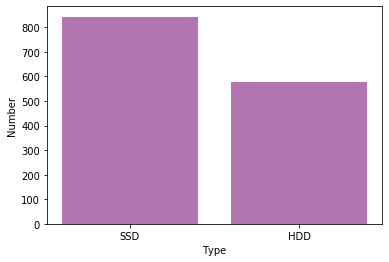

In [25]:
height = [ssd_nums, hdd_nums]
bars = ('SSD', 'HDD')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

plt.xlabel('Type')
plt.ylabel('Number')

plt.xticks(y_pos, bars)

plt.show()